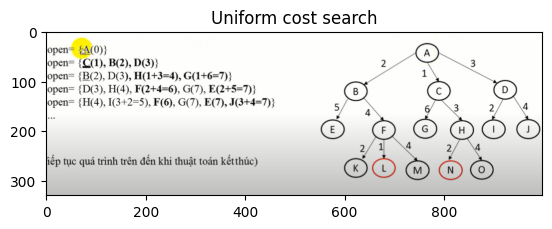

In [2]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

plt.title("Uniform cost search")

image = mpimg.imread("index.png")
plt.imshow(image)
plt.show()


In [4]:
from collections import defaultdict
from queue import PriorityQueue

data = defaultdict(list)
data['A'] = ['B', 2, 'C', 1, 'D', 3]
data['B'] = ['E', 5, 'F', 4]
data['C'] = ['G', 6, 'H', 3]
data['D'] = ['I', 2, 'J', 4]
data['F'] = ['K', 2, 'C', 1, 'M', 4]
data['H'] = ['N', 2, 'O', 4]


In [5]:
class Node:
    def __init__(self, name, par = None, g =0):
        self.name = name
        self.par = par
        self.g =g
    def display(self):
        print(self.name, self.g)
    def __lt__ (self, other):
        if other == None :
            return False
        return self.g < other.g
    def __eq__ (self , other):
        if other == None:
            return False
        return self.name== other.name


In [6]:
def equal(O, G):
    return O.name == G.name


def checkInPriority(tmp, c):
    if tmp == None:
        return False
    return tmp in c.queue


def getPath(O):
    print(O.name)
    if O.par != None:
        getPath(O.par)
    else:
        return


In [7]:
def UniformCostSearch(S = Node('A') , G = Node('N')):
    Open = PriorityQueue()
    Closed = PriorityQueue()

    Open.put(S)
    while True :
        if Open.empty() == True:
            print('Tim kiem that bai')
            return
        O = Open.get()
        Closed.put(O)
        print('Duyet: ', O.name , O.g)

        if equal(O, G) : 
            print('Tim kiem thanh cong')
            getPath(O)
            print ('distance: ', O.g)
            return
        i = 0
        while i < len(data[O.name]) :
            name = data[O.name][i]
            g = O.g + data[O.name][i+1]
            tmp = Node(name = name, g = g)
            tmp.par = O

            ok1 = checkInPriority(tmp, Open)
            ok2 = checkInPriority(tmp, Closed)

            if not ok1 and not ok2:
                Open.put(tmp)
            i+=2


In [10]:
UniformCostSearch(Node('A'), Node('J'))

Duyet:  A 0
Duyet:  C 1
Duyet:  B 2
Duyet:  D 3
Duyet:  H 4
Duyet:  I 5
Duyet:  N 6
Duyet:  F 6
Duyet:  G 7
Duyet:  J 7
Tim kiem thanh cong
J
D
A
distance:  7
